# Phyiscs Problems - Lectures 18 & 19 - Homework 9 

FALL 2023


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a program that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [12]:
import math
def height(t):
    g = 6.67 * (10**(-11))
    m = 5.97 * (10**24)
    r = 6371 * 1000 #km to m
    #t = float(input("Enter the desired value of T: "))
    p = math.pi
    h = (((g*m*(t**2))/(4*(p**2)))**(1/3)) - r

    return h

print(int(height(float(input("Enter the desired value of T: ")))),"meters")

Enter the desired value of T: 5400
279321 meters


Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [28]:
#Since we are given a negative number when the satellite orbits every 45 minutes, this means that it would orbit below
#the surface of the Earth in order to be close enough to have a fast orbit like this.

In [23]:
print(int(height(5400)),"meters") #90min
print(int(height(2700)),"meters") #45min


279321 meters
-2181559 meters


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [27]:
h1 = int(height(86400))
h2 = int(height(86148))
print("Difference is",h1-h2,"meters")
print(h1)
print(h2)

#First of all a sidereal day is the time it takes for a planet to rotate once in its axis. Meaning that the true time 
#for Earth to make a full rotation is at 23.93 hours and not 24 hours, which would make sense why the satellite orbits
#at the same time as a full rotation of Earth, since the satellite needs to orbit at the same speed as Earth. The 
#difference of altitude is about 82,148 meters.

Difference is 82148 meters
35855910
35773762


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heeghts with times less than geosynchronous in blue and those longer in green.

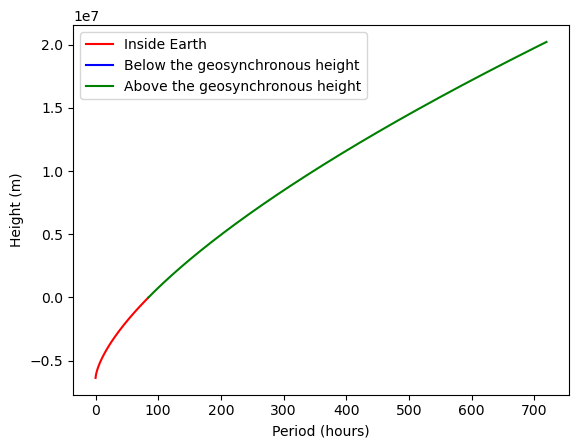

In [18]:
from pylab import plot,xlabel,ylabel,show,legend

mt = 24*30 # hours
st = 0.5 # hours

t = []

p_ie = []
p_bg = []
p_ag = []

ie = []
bg = []
ag = []

for i in range(int(mt / st)):
    t.append(i*st*60)
    h = height(i*st*60)
    
    if h <= 0:
        ie.append(h)
        p_ie.append(i*st)
    elif h <= height(23.93*60):
        bg.append(h)
        p_bg.append(i*st)
    else:
        ag.append(h)
        p_ag.append(i*st)
    
plot(p_ie, ie, color="r")
plot(p_bg, bg, color="b")
plot(p_ag, ag, color="g")
legend(["Inside Earth", "Below the geosynchronous height", "Above the geosynchronous height"])
xlabel("Period (hours)")
ylabel("Height (m)")
show()

### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [3]:
import math

v = float(input("What is the velocity as a fraction of the speed of light? "))
x = float(input("How far are you traveling in light years? "))

t = x / v

print("Observing from Earth it took {:.2f}".format(t),"years.")

ts = (t*(math.sqrt(1 - v**2)))

print("Passengers on board the ship percieved to take {:.2f}".format(ts),"years.")



What is the velocity as a fraction of the speed of light? 0.9
How far are you traveling in light years? 10
Observing from Earth it took 11.11 years.
Passengers on board the ship percieved to take 4.84 years.


#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [1]:
import math

def p(f,y):
    v = f
    print("What is the velocity as a fraction of the speed of light?",v)
    
    x = y
    print("How far are you traveling in light years?",x)
    
    t = x / v
    
    print("Observing from Earth it took {:.2f}".format(t),"years.")
    
    ts = (t*(math.sqrt(1 - v**2)))
    
    print("Passengers on board the ship percieved to take {:.2f}".format(ts),"years.")
    

p(0.9,10)
p(0.98,10)
p(0.999,10)

What is the velocity as a fraction of the speed of light? 0.9
How far are you traveling in light years? 10
Observing from Earth it took 11.11 years.
Passengers on board the ship percieved to take 4.84 years.
What is the velocity as a fraction of the speed of light? 0.98
How far are you traveling in light years? 10
Observing from Earth it took 10.20 years.
Passengers on board the ship percieved to take 2.03 years.
What is the velocity as a fraction of the speed of light? 0.999
How far are you traveling in light years? 10
Observing from Earth it took 10.01 years.
Passengers on board the ship percieved to take 0.45 years.


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [51]:
import math
import numpy as np

a = float(input("a value:"))
b = float(input("b value:"))
c = float(input("c value:"))

x1 = ((-b) + math.sqrt((b**2)-(4*a*c))) / 2*a
x2 = ((-b) - math.sqrt((b**2)-(4*a*c))) / 2*a

s1 = a*(x1**2) + b*x1 + c
s2 = a*(x2**2) + b*x2 + c

print("")
print(s1)
print(s2)

a value:0.001
b value:1000
c value:0.001

0.0009999990000105754
-999.9979999990001


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [3]:
import math
import numpy as np

a = float(input("a value:"))
b = float(input("b value:"))
c = float(input("c value:"))

x1 = ((-b) + math.sqrt((b**2)-(4*a*c))) / 2*a
x2 = ((-b) - math.sqrt((b**2)-(4*a*c))) / 2*a
s1 = a*(x1**2) + b*x1 + c
s2 = a*(x2**2) + b*x2 + c

print("")
print(s1)
print(s2)

y1 = 2*c / -b - math.sqrt((b**2)-4*a*c)
y2 = 2*c / -b + math.sqrt((b**2)-4*a*c)
t1 = a*(y1**2) + b*y1 + c
t2 = a*(y2**2) + b*y2 + c

print("")
print(t1)
print(t2)

#The second formula gives solutions bigger than the first one by 1 decimal place because of its index

a value:0.001
b value:1000
c value:0.001

0.0009999990000105754
-999.9979999990001

0.0
1000999.9989939961


In [61]:
def sq(a,b,c):
    r = b*b - 4*a*c
    if r >= 0:
        x = (-b + math.sqrt(r)) / 2*a
        y = (-b - math.sqrt(r)) / 2*a
    else:
        rl = -b / 2*a
        m = math.sqrt(-1*r) / 2*a
        x = str(rl) + " + " + " i " + str(m)
        y = str(rl) + " - " + " i " + str(m)
    return x,y

print(sq(0.001,1000,0.001))

(-9.999894245993345e-13, -0.999999999999)


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

### 4) Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $l_1$ of closest approach that a planet makes to the Sun, also called its perihelion, and its linear velocity $v_1$ at *perihelion*, then any other property of the orbit can be calculated from these two as follows.

Kepler’s second law tells us that the distance $l_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $l_2 v_2 = l_1 v_1$. 


Given the values of $v_1$, $l_1$, and $l_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler’s laws and the fact that the orbit is an ellipse:

Semi-Major Axis $$ a = \frac{1}{2} (l_1 + l_2) $$ 
Semi-Minor Axis: $$ b = \sqrt{l_1  l_2} $$ 
Orbital Period: $$ T = \frac{2 \pi a b}{l_1 v_1} $$ 
Orbital eccentricity:  $$ e = \frac{l_2 - l_1}{l_2 + l_1}$$

#### Write a program with functions that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $l2$, $v2$, $a$, $b$, $T$, and $e$.




In [23]:
import math

l1 = float(input("Enter the perihelion in meters: "))
v1 = float(input("Enter the velocity at perihelion in m/s: "))

g = 1.989 * (10**30)
m =  6.67428 * (10**-11)
A = 1
B = -(2*g*m) / (v1*l1)
C = -(v1**2 - ((2*g*m) / l1))

x1 = (-B + math.sqrt((B**2)- (4 * A * C))) / (2 * A)
v2 = (-B - math.sqrt((B**2)- (4 * A * C))) / (2 * A)

l2 = (l1*v1) / v2

a = (1/2) * (l1+l2)

b = math.sqrt(l1*l2)

t = (2 * math.pi * a * b) / (l1 *v1)

e = (l2-l1) / (l2+l1) 

print("l1 =",l2,"meters")
print("v2 =",v2,"m/s")
print("a =",a,"meters")
print("b =",b,"meters")
print("T",t,"years")
print("e =",e)

Enter the perihelion in meters: 1.471e11
Enter the velocity at perihelion in m/s: 3.0287e4
29306.689080558343
152020505890.42932
149560252945.21466
149540016104.32626
31541660.44667599
0.016449911636053964


#### Test your program by having it calculate the properties of the orbits of the Earth (for which $l_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4$ m s$^{−1}$ ) and Halley’s comet ($l_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4$ m s${−1}$ ). Among other things, you should find that the orbital period of the Earth is one year and that of Halley’s comet is about 76 years.

In [4]:
import math

l1 = float(input("Enter the perihelion in meters: "))
v1 = float(input("Enter the velocity at perihelion in m/s: "))

g = 1.989 * (10**30)
m =  6.67428 * (10**-11)
A = 1
B = -(2*g*m) / (v1*l1)
C = -(v1**2 - ((2*g*m) / l1))

x1 = (-B + math.sqrt((B**2)- (4 * A * C))) / (2 * A)
v2 = (-B - math.sqrt((B**2)- (4 * A * C))) / (2 * A)

l2 = (l1*v1) / v2

a = (1/2) * (l1+l2)

b = math.sqrt(l1*l2)

t = (2 * math.pi * a * b) / (l1 *v1) / 3.154e7

e = (l2-l1) / (l2+l1) 

print("l1 =",l2,"meters")
print("v2 =",v2,"m/s")
print("a =",a,"meters")
print("b =",b,"meters")
print("T",t,"years")
print("e =",e)

Enter the perihelion in meters: 1.471e11
Enter the velocity at perihelion in m/s: 3.0287e4
l1 = 152020505890.42932 meters
v2 = 29306.689080558343 m/s
a = 149560252945.21466 meters
b = 149540016104.32626 meters
T 1.0000526457411538 years
e = 0.016449911636053964


In [5]:
import math

l1 = float(input("Enter the perihelion in meters: "))
v1 = float(input("Enter the velocity at perihelion in m/s: "))

g = 1.989 * (10**30)
m =  6.67428 * (10**-11)
A = 1
B = -(2*g*m) / (v1*l1)
C = -(v1**2 - ((2*g*m) / l1))

x1 = (-B + math.sqrt((B**2)- (4 * A * C))) / (2 * A)
v2 = (-B - math.sqrt((B**2)- (4 * A * C))) / (2 * A)

l2 = (l1*v1) / v2

a = (1/2) * (l1+l2)

b = math.sqrt(l1*l2)

t = (2 * math.pi * a * b) / (l1 *v1) / 3.154e7

e = (l2-l1) / (l2+l1) 

print("l1 =",l2,"meters")
print("v2 =",v2,"m/s")
print("a =",a,"meters")
print("b =",b,"meters")
print("T",t,"years")
print("e =",e)

Enter the perihelion in meters: 8.7830e10
Enter the velocity at perihelion in m/s: 5.4529e4
l1 = 5275233253753.388 meters
v2 = 907.8806262438484 m/s
a = 2681531626876.694 meters
b = 680678879264.7822 meters
T 75.92293035878231 years
e = 0.9672463307463206
